# Week 1 - Tasks

- **Data Source:** `yfinance`
- **Assets:** `AAPL`, `MSFT`, `GOOG`, `AMZN`, `TSLA` (and `NVDA` for Task 5)
- **Timeframes:**
  * **Long Term:** `start="2015-01-01", end="2024-01-01"`
  * **Medium Term:** `start="2020-01-01", end="2024-01-01"` (Includes COVID crash)

The goal for this week is to gain familiarity with financial data, analyze common trends, learn standard library functions, and touch upon the underlying theory.

In [ ]:
import yfinance as yf
import numpy as np
df = yf.download(
    "AAPL",
    start="2015-01-01",
    end="2024-01-01",
    auto_adjust=False      
)
df["Adj Close"].head(20)  

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015-01-02,24.237553
2015-01-05,23.554745
2015-01-06,23.556961
2015-01-07,23.887274
2015-01-08,24.805088
2015-01-09,24.831690
2015-01-12,24.219816
2015-01-13,24.434851
2015-01-14,24.341745


## Task 1 - Setup
* Fetch **Long Term** historical data for the 5 assets.
* Extract the `Adjusted Close` values.
    * *Note: Check for missing values or empty rows and handle them (drop or fill).*
* Use `df.describe()` to extract key summary statistics.
* Extract the **Medium Term** data as well for later tasks.

In [ ]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"]

#fetched long term data
data_longterm = yf.download( tickers,  start="2015-01-01",  end="2024-01-01", auto_adjust=False)

#forward and backward fill used to fill in data of missed days 
adj_close = data_longterm["Adj Close"].ffill().bfill()

adj_close.describe()

#fetched medium term data 
data_mediumterm = yf.download( tickers,  start="2020-01-01",  end="2024-01-01", auto_adjust=False)


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


For just analysis ( needed in Task 3-4)
below I printed some data of covid term to analyse the change that happened in stock volatility during covid period .

In [37]:
aapl_mt = data_mediumterm["Adj Close"]
aapl_covid = aapl_mt.loc["2020-02-01":"2020-04-01"]

print("COVID PERIOD (Feb–Apr 2020):")
print(aapl_covid.head(10))
print(aapl_covid.tail(10))
print("\nMissing values in COVID slice:", aapl_covid.isna().sum())

COVID PERIOD (Feb–Apr 2020):
Ticker           AAPL        AMZN       GOOG        MSFT       TSLA
Date                                                               
2020-02-03  74.473282  100.209999  73.743904  165.570541  52.000000
2020-02-04  76.931931  102.483498  71.814873  171.020554  59.137333
2020-02-05  77.559280  101.993500  71.872459  170.811691  48.980000
2020-02-06  78.466461  102.511497  73.262024  174.353271  49.930668
2020-02-07  77.399895  103.963997  73.410904  174.600098  49.871334
2020-02-10  77.767509  106.695503  74.872437  179.167114  51.418667
2020-02-11  77.298309  107.540001  74.877899  175.122330  51.625332
2020-02-12  79.133965  108.000000  75.348366  175.378723  51.152668
2020-02-13  78.570450  107.493500  75.169220  174.429245  53.599998
2020-02-14  78.589813  106.743500  75.470970  175.986359  53.335335
Ticker           AAPL       AMZN       GOOG        MSFT       TSLA
Date                                                              
2020-03-19  59.200531

## Task 2 - Basic Trends
* Select **one asset** and using the **Medium Term** data, compute:
    * **Returns:** 1-day, 5-day, and 20-day simple returns.
    * **Log Returns:** 1-day, 5-day, and 20-day log returns.
    * **Volatility:** 5-day, 20-day, and 60-day rolling standard deviation (volatility) of the log returns.
* **Plotting:**
    * Plot the price and the 20-day moving average on one chart.
    * Plot the 1-day log returns on a separate chart.
    * Plot the rolling volatilities on a third chart.
    * *Analysis:* What trends do you observe? Does high volatility correlate with price drops?

* **Bonus (Long Term Data):**
    * Create a scatter plot of `|Daily Return|` vs `Volume`. Is there a relationship?
    * Group returns and volatility by **Month** (e.g., all Januaries, all Februaries) and plot the averages. Is there a "seasonal" effect?

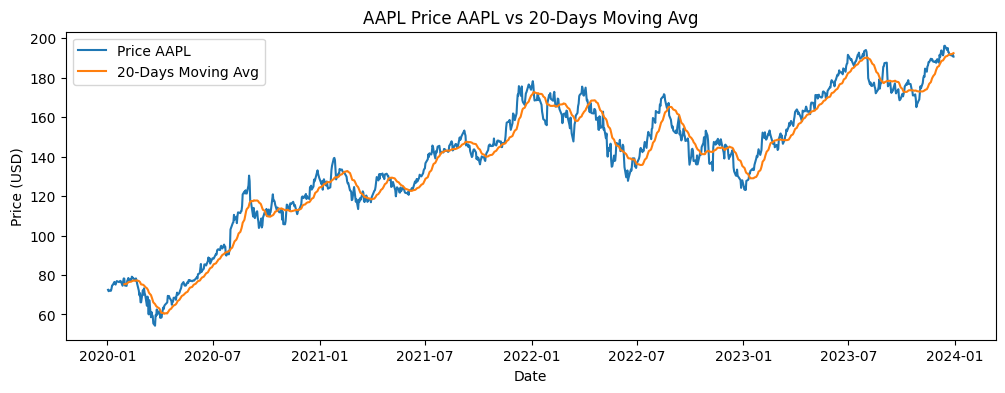

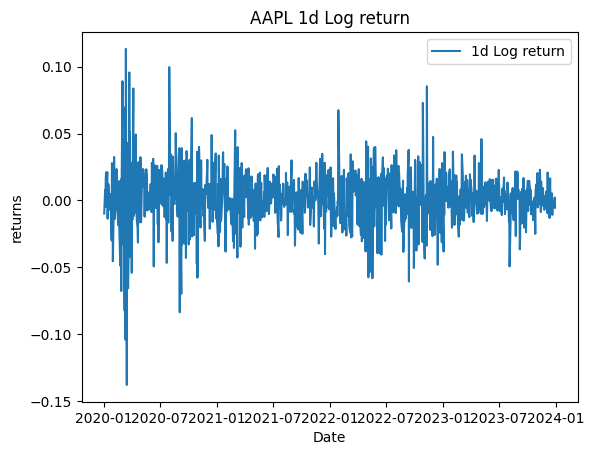

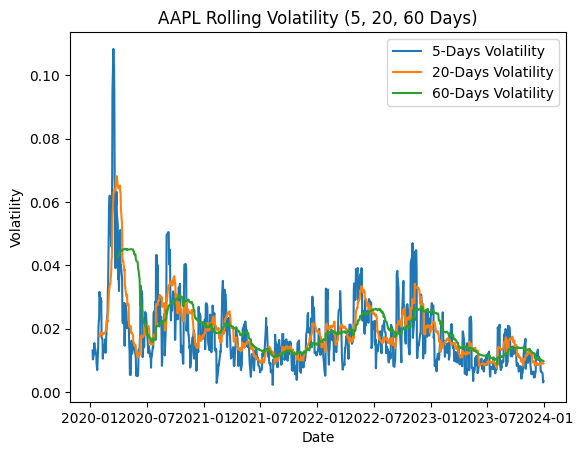

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

aapl = data_mediumterm["Adj Close"]["AAPL"].ffill().bfill()

#simple return
return_1d = aapl.pct_change(1)
return_5d = aapl.pct_change(5)
return_20d = aapl.pct_change(20)

#log return
log_return_1d = np.log(aapl).diff(1).dropna()
log_return_5d = np.log(aapl).diff(5).dropna()
log_return_20d = np.log(aapl).diff(20).dropna()
log_return_1d.head(10)

#Volatility
vol_5d = log_return_1d.rolling(5).std()
vol_20d = log_return_1d.rolling(20).std()
vol_60d = log_return_1d.rolling(60).std()

#Plotting
plt.figure(figsize=(12, 4))
# 20-Days moving avg chart
mavg_20 = aapl.rolling(20).mean()

plt.plot(aapl, label="Price AAPL")
plt.plot(mavg_20, label="20-Days Moving Avg")   

plt.title("AAPL Price AAPL vs 20-Days Moving Avg")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.legend()
plt.show()

# 1-Day Log return chart

plt.plot(log_return_1d, label="1d Log return")   

plt.title("AAPL 1d Log return")
plt.xlabel("Date")
plt.ylabel("returns")

plt.legend()
plt.show()

# Rolling volatility
plt.plot(vol_5d, label="5-Days Volatility")
plt.plot(vol_20d, label="20-Days Volatility")
plt.plot(vol_60d, label="60-Days Volatility")

plt.title("AAPL Rolling Volatility (5, 20, 60 Day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()

plt.show()


During covid time March 2020, there was huge uncertainty and selloffs which lead to high volatility and price drop , they do correlate. 5 days will show more voilent changes compared to 20 and 60 days which are smoother .

## Task 3 - Stationarity
* Select **one asset** (Long Term).
* Compute the **Rolling Mean** and **Rolling Standard Deviation** of log returns with window sizes `20, 60, 120`.
* Plot them and visually inspect.
    * Does the mean stay constant? (Stationary mean)
    * Does the variance stay constant? (Stationary variance)
* Run an **Augmented Dickey-Fuller (ADF) Test** on the log return series.
    * Library: `from statsmodels.tsa.stattools import adfuller`
    * *Goal:* Interpret the p-value. The Null Hypothesis ($H_0$) is that the series is non-stationary (has a unit root). If p-value < 0.05, we reject $H_0$.
    * For learning about hypothesis testing and p-value you can refer to CS215 slides or other standard resources mentioned in READMEs.

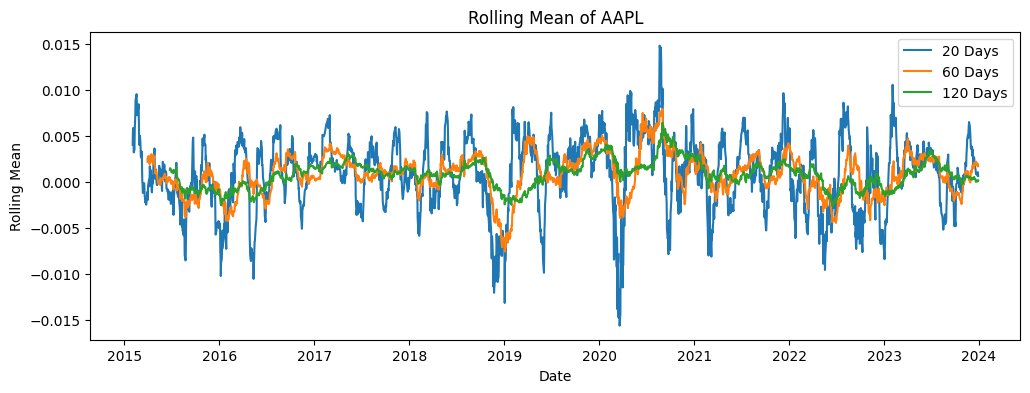

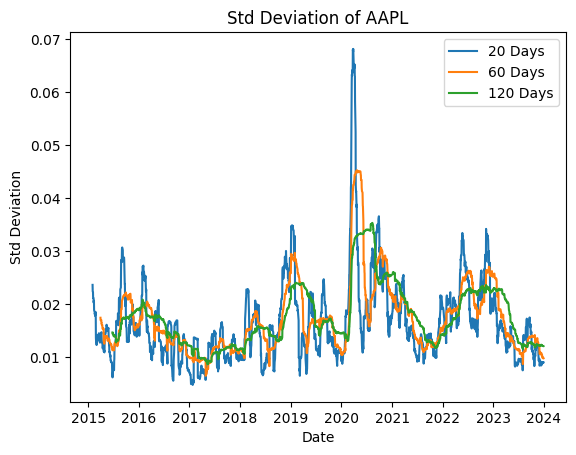

In [31]:
aapl = data_longterm["Adj Close"]["AAPL"].ffill().bfill()
log_return_longterm = np.log(aapl).diff().dropna()
plt.figure(figsize=(12, 4))

# Rolling mean and plot
Rmean_20=log_return_longterm.rolling(20).mean()
Rmean_60=log_return_longterm.rolling(60).mean()
Rmean_120=log_return_longterm.rolling(120).mean()

plt.plot(Rmean_20, label="20 Days")
plt.plot(Rmean_60, label="60 Days")
plt.plot(Rmean_120, label="120 Days")

plt.title("Rolling Mean of AAPL")
plt.xlabel("Date")
plt.ylabel("Rolling Mean")

plt.legend()
plt.show()

# Rolling Std Deviation and plot
Rstd_20=log_return_longterm.rolling(20).std()
Rstd_60=log_return_longterm.rolling(60).std()
Rstd_120=log_return_longterm.rolling(120).std()

plt.plot(Rstd_20, label="20 Days")
plt.plot(Rstd_60, label="60 Days")
plt.plot(Rstd_120, label="120 Days")

plt.title("Std Deviation of AAPL")
plt.xlabel("Date")
plt.ylabel("Std Deviation")

plt.legend()
plt.show()


Mean is stationary.
Variance isn't constant mainly due to highly varied volatility in covid and year 2022 .

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(log_return_longterm)
result
pvalue = result[1]
pvalue

np.float64(2.8065534691189432e-27)

p value comes out to significantly less than 0.05 so , log returns are stationary.

## Task 4 - Volatility Regimes
We try to study the trend in volatility more deeply. From the ACF/PACF plot we know that volatility tends to cluster that is the market is either in a high volatility state (greater daily fluctuations) or low volatility state (stable prices, quiet markets).

Formally we can treat volatility as a *conditional standard deviation of returns*, conditioned on the history observed so far. We *cannot* predict *true* volatility for a given day based on the single return value, hence we try to estimate it using the past information. For this we look at two indicators of volatility:

1.  **Rolling Window Volatility:** Simple Moving Average (SMA) of standard deviation.
2.  **EWMA Volatility:** Exponentially Weighted Moving Average. This gives more weight to recent events. It is given by $\sigma_t^2 = (1-\lambda)r_t^2 + \lambda \sigma_{t-1}^2$.

**Steps:**
* Pick an asset and use data covering the **Feb-Mar 2020 COVID crash**.
* Compute two volatility estimates on the Log Returns:
    1.  **Rolling 20-day Volatility:** Standard deviation over a 20-day window.
    2.  **EWMA Volatility (RiskMetrics):** Use a decay factor $\lambda = 0.94$.
        * *Hint:* In pandas `df.ewm()`, the parameter `alpha` corresponds to $1 - \lambda$. So, use `alpha=0.06`.
* **Analysis:**
    * Plot both estimates on the same chart.
    * Which is smoother?
    * Which estimator reacts faster to the sudden crash in March 2020?
    * Which one would you prefer for risk management?
* **Regime Detection:** Compute the 60th percentile of your EWMA volatility series. Shade the regions on the plot where volatility exceeds this level.

* **Bonus:** A good volatility model "standardizes" the returns well. Calculate $z_t = r_t / \hat{\sigma}_t$. If the model is good, $z_t$ should have $Var \approx 1$. Check the variance of $z_t$ and plot its histogram.

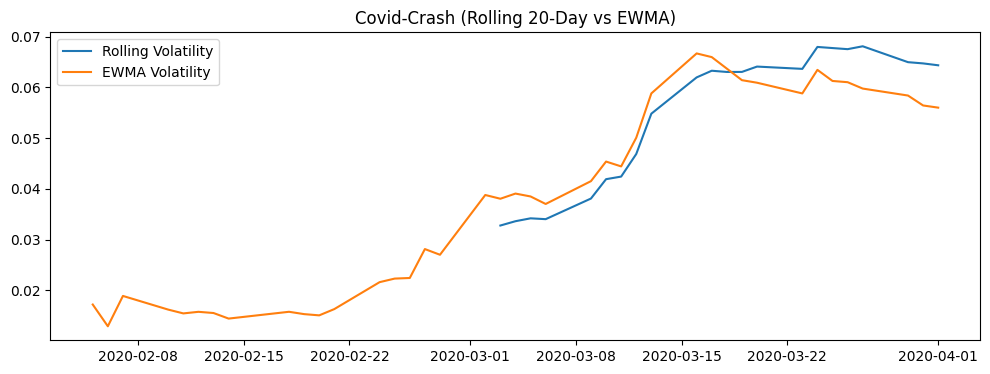

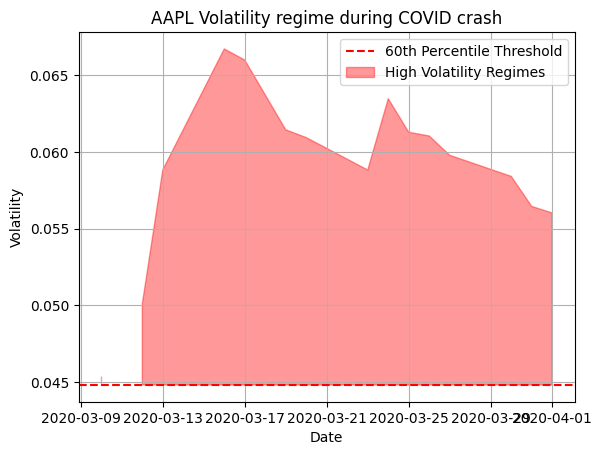

In [45]:
aapl_covid = aapl.loc["2020-02-01":"2020-04-01"]
log_return_covid = np.log(aapl_covid).diff().dropna()
plt.figure(figsize=(12, 4))

# 20-day rolling volatility
rvol_20 = log_return_covid.rolling(20).std()

# EWMA volatility (alpha = 0.06)
ewma_vol =log_return_covid.ewm(alpha=0.06).std()

# Plot
plt.plot(rvol_20, label=f"Rolling Volatility")
plt.plot(ewma_vol, label=f"EWMA Volatility")
plt.title(f"Covid-Crash (Rolling 20-Day vs EWMA)")
plt.legend()
plt.show()

threshold = ewma_vol.quantile(0.60)
threshold
plt.axhline(threshold, color='red', linestyle='--', label="60th Percentile Threshold")

# Shade 60 %tile line
plt.fill_between(
    ewma_vol.index,
    ewma_vol,
    threshold,
    where=(ewma_vol > threshold),
    color='red',
    alpha=0.4,
    label="High Volatility Regimes"
)

plt.title("AAPL Volatility regime during COVID crash")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)

plt.show()


1. EWMA is smoother than rolling volatility as we analyse rapid peak around march.
2. EWMA responds faster.
3. EWMA is preferred as it responds faster to new changes and risk.

## Task 5 - Time Horizons and the "Normal" Illusion
Short-term markets are noisy and dangerous (fat tails), while long-term data looks smoother. We can prove this statistically using **Skew** and **Kurtosis**.

**Theory:**
* **Skewness:** Measures asymmetry. (Negative skew = frequent small gains, few extreme losses).
* **Kurtosis:** Measures "tailedness". (High kurtosis = frequent extreme events/crashes).
* **Normal Distribution:** Skew $\approx 0$, Kurtosis $\approx 3$ (or Excess Kurtosis $\approx 0$).

**Steps:**
1.  Take your **Long Term** data for one asset (e.g., NVDA or TSLA).
2.  Resample the prices to get **Weekly** and **Monthly** closes.
    * Use `df['Adj Close'].resample('W').last()` and `...resample('M').last()`.
3.  Compute Log Returns for all three series: Daily, Weekly, Monthly.
4.  **The Test:**
    * Calculate **Skew** and **Kurtosis** for each of the three return series.
    * *Question:* How do these values change as the time horizon increases? Do they get closer to 0 and 3?
5.  **Visualization:**
    * Plot the **Histograms** of the Daily returns vs. Monthly returns on the same plot.
    * *Tip:* You will need to standardize them (subtract mean, divide by std dev) to overlay them meaningfully.
    * *Observation:* Look at the tails. Which one has "fatter" tails (more extreme outliers)?

**Key Takeaway:**
Daily returns often violate the "Normal Distribution" assumption used in many financial models. Long-term returns fit it better. This is called *Aggregational Gaussianity*.

**Bonus:** This is a direct application of a simple yet well-known result in asymptotic statistics. Can you find out what it is and state how it explains this observation?

In [53]:
import scipy.stats as st

asset = "AAPL"  
prices_longterm = data_longterm["Adj Close"][asset].ffill().bfill()

# Resampling
prices_weekly  = prices_longterm.resample("W").last()
prices_monthly = prices_longterm.resample("M").last()

#lets print data for some analysis
print("\nweekly prices (first 10 rows):")
print(prices_weekly.head(10))

print("\nmonthly prices (first 10 rows):")
print(prices_monthly.head(10))

#  log returns
daily_logreturn = np.log(prices_longterm).diff().dropna()
weekly_logreturn = np.log(prices_weekly).diff().dropna()
monthly_logreturn = np.log(prices_monthly).diff().dropna()

#4
print("Skew & Kurtosis of Returns ")

print("\nDaily Return:")
print(" Skew:", st.skew(daily_logreturn))
print("Kurtosis:", st.kurtosis(daily_logreturn))   

print("\nWeekly Return:")
print(" Skew:", st.skew(weekly_logreturn))
print("Kurtosis:", st.kurtosis(weekly_logreturn))

print("\nMonthly Return:")
print(" Skew:", st.skew(monthly_logreturn))
print("Kurtosis:", st.kurtosis(monthly_logreturn))


weekly prices (first 10 rows):
Date
2015-01-04    24.237553
2015-01-11    24.831690
2015-01-18    23.497101
2015-01-25    25.046724
2015-02-01    25.973406
2015-02-08    26.469841
2015-02-15    28.283766
2015-02-22    28.822374
2015-03-01    28.590906
2015-03-08    28.176939
Freq: W-SUN, Name: AAPL, dtype: float64

monthly prices (first 10 rows):
Date
2015-01-31    25.973406
2015-02-28    28.590906
2015-03-31    27.693966
2015-04-30    27.854212
2015-05-31    29.117098
2015-06-30    28.033140
2015-07-31    27.110098
2015-08-31    25.315512
2015-09-30    24.763218
2015-10-31    26.828697
Freq: ME, Name: AAPL, dtype: float64
Skew & Kurtosis of Returns 

Daily Return:
 Skew: -0.22614419864546983
Kurtosis: 5.400915689442645

Weekly Return:
 Skew: -0.38864232726677916
Kurtosis: 2.2682850318523116

Monthly Return:
 Skew: -0.24188787408452597
Kurtosis: -0.4859648045294831


/var/folders/_5/g0c1tvhj02d5dsfsntg1bwmh0000gn/T/ipykernel_1084/3664562303.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_monthly = prices_longterm.resample("M").last()


As time horizon increases , these values move closer to normal distribution, like for monthly return skew will be closer to 0 and kurtosis will be around 3.

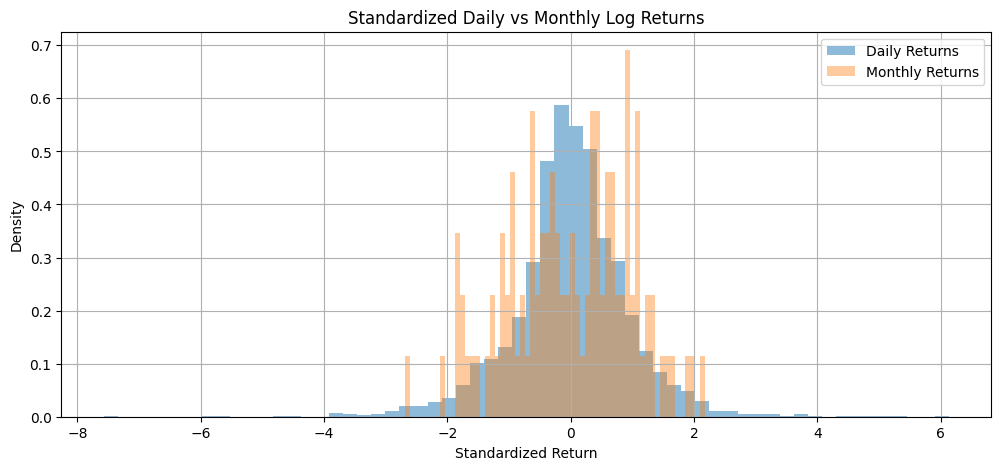

In [59]:
#histogram Part
daily_std = (daily_logreturn - daily_logreturn.mean()) / daily_logreturn.std()
monthly_std = (monthly_logreturn - monthly_logreturn.mean()) / monthly_logreturn.std()

plt.figure(figsize=(12, 5))
plt.hist(daily_std, bins=60, alpha=0.5, label="Daily Returns", density=True)
plt.hist(monthly_std, bins=60, alpha=0.4, label="Monthly Returns", density=True)

plt.title("Standardized Daily vs Monthly Log Returns")
plt.xlabel("Standardized Return")
plt.ylabel("Density")

plt.legend()
plt.grid(True)
plt.show()

most I can understand off this is that daily returns have more sigificant changes compared to smoother monthly ones that is why they have thick tails.

## Task 6 - Smart investing
Calculate how many **RTX 4090s** (approx. price $1,600$) you could afford *today* if you had invested **$1,000** in NVIDIA on the day you were born.

In [ ]:
dob = "2007-12-25"
investment = 1000
RTX4090s_price = 1600

#On christmas market are closed so we need t find closest possible data from that day

nvda = yf.download("NVDA", start="2007-12-20", end="2008-01-05", auto_adjust=True)

old_price = nvda.loc[nvda.index >= dob]["Close"].iloc[0]

latest_price = yf.download("NVDA", period="1d", auto_adjust=True)["Close"].iloc[0]

shares = investment / old_price

value_today = shares * latest_price

gpu = int(value_today /RTX4090s_price)

old_price, latest_price, shares, value_today, gpu

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/var/folders/_5/g0c1tvhj02d5dsfsntg1bwmh0000gn/T/ipykernel_1084/1073437695.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  gpu = int(value_today /RTX4090s_price)


(Ticker
 NVDA    0.83111
 Name: 2007-12-26 00:00:00, dtype: float64,
 Ticker
 NVDA    180.929993
 Name: 2025-12-11 00:00:00, dtype: float64,
 Ticker
 NVDA    1203.209474
 Name: 2007-12-26 00:00:00, dtype: float64,
 Ticker
 NVDA    217696.68123
 dtype: float64,
 136)